In [1]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.nestcomparison import NestComparison
from pelenet.network import ReservoirNetwork

# Official modules
import numpy as np
import scipy
from scipy.sparse import csr_matrix
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import os
from time import time
import copy

In [2]:
# Initilize utils
utils = Utils.instance()

In [3]:
def execRun(name, i):
    """
    Read data
    """
    # Add input
    inp = np.load('data/nest2/'+str(name)+'/input_pop_'+str(i)+'.npy')

    # Add mask
    exex = csr_matrix(np.load('data/nest2/'+str(name)+'/weights_ee_'+str(i)+'.npy'))
    exin = csr_matrix(np.load('data/nest2/'+str(name)+'/weights_ei_'+str(i)+'.npy'))
    inex = csr_matrix(np.load('data/nest2/'+str(name)+'/weights_ii_'+str(i)+'.npy'))
    inin = csr_matrix(np.load('data/nest2/'+str(name)+'/weights_ie_'+str(i)+'.npy'))
    ma = { 'exex': exex, 'inin': inin, 'inex': inex, 'exin': exin }
    
    """
    Run experiment
    """
    # Init experiment
    exp = NestComparison()

    # Build network
    exp.net = ReservoirNetwork(exp.p)

    # Define mask
    exp.net.initialMasks.exex = ma['exex']
    exp.net.initialMasks.exin = ma['exin']
    exp.net.initialMasks.inex = ma['inex']
    exp.net.initialMasks.inin = ma['inin']

    # Set weights
    exp.setSparseWeightMatrix()

    # Connect
    exp.net.connectReservoir()

    # Add patch input
    exp.net.addRepeatedPatchGenerator(idc = inp-1)

    # Build the network structure
    exp.net.build()

    # Run network
    exp.run()
    
    """
    Store data
    """
    
    spikes = exp.net.exSpikeTrains[:,exp.p.resetOffset:500+exp.p.resetOffset]
    np.save('data/loihi/'+str(name)+'/spikes_'+str(i)+'.npy', spikes)
    
    #if i==0:
    #    parameters = copy.deepcopy(exp.p)
    #    np.save('data/loihi/'+str(name)+'/parameters.npy',parameters)

In [4]:
#name = 'one_network_15_locations'
name = 'one_location_15_networks'

for i in range(13,15):
    execRun(name, i)

INFO:DRV:  Connecting to 127.0.0.1:35085
INFO:DRV:      Host server up..............Done 0.05s
INFO:DRV:      Encoding axons/synapses.....Done 14.64s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592569539.891523
Include dir is : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/05-reward/v0.x/pelenet/snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592569539.891523/initnetwork_0_0.c
gcc -Wall -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/05-reward/v0.x/pelenet/snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=

INFO:DRV:      Compiling Embedded snips....Done 0.56s
INFO:DRV:      Encoding probes.............Done 3.89ms
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592569539.891523/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592569539.891523/launcher_chip1_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.50s
INFO:DRV:      Transferring probes.........Done 0.02s
INFO:DRV:      Configuring registers.......Done 16.27s
INFO:DRV:      Transferring spikes.........Done 6.73ms
INFO:HST:  chip=1 cpu=0 Transfered values 20, 535, 30 
INFO:HST:  chip=0 cpu=0 Transfered values 20, 535, 30 
INFO:HST:  chip=0 cpu=0 Reset current/volta

Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592569746.8206239
Include dir is : /home/seq/05-reward/v0.x/pelenet/snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592569746.8206239/initnetwork_1_0.c
gcc -Wall -I/home/seq/05-reward/v0.x/pelenet/snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592569746.8206239/initnetwork_1_0.c.o -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592569746.8206239/initnetwork_1_0.c
Compiling without -c /home/seq/.local/share/virtualenvs/seq-r0_W

In [3]:
# Get NEST spikes
def translateNestSpikes(nest):
    spikes = []

    mi, ma = int(np.floor(np.min(nest[0]))), int(np.ceil(np.max(nest[0])))
    for t in range(mi, ma):
        idcs = []
        for i in np.arange(0.0,1.0,0.1):
            idcs.extend(np.where(np.isclose(nest[0], t+i))[0])
        spkVec = np.zeros(p.reservoirExSize)
        spkVec[nest[1, idcs].astype(int)-1] = 1
        spikes.append(spkVec)
        
    return np.array(spikes).T

In [4]:
def readNestSpikes(name):
    nest = []

    for i in range(15):
        # Add times
        times = np.load('data/nest2/'+str(name)+'/spike_times_'+str(i)+'.npy')

        # Add indices
        lastIdc = np.where(times < 509)[0][-1]
        inds = np.load('data/nest2/'+str(name)+'/spike_indices_'+str(i)+'.npy')
        
        # Combine
        raw = np.array([times[:lastIdc], inds[:lastIdc]])
        
        # Translates spikes from Nest in Loihi format
        nest.append(translateNestSpikes(raw))

    # Return list of nest results
    return np.array(nest)

In [5]:
def readLoihiParameters():
    #return np.load('data/loihi/'+str(name)+'/parameters.npy')
    exp = NestComparison()
    return exp.p

In [6]:
def readLoihiSpikes(name):
    loihi = []

    for i in range(15):
        loihi.append(np.load('data/loihi/'+str(name)+'/spikes_'+str(i)+'.npy'))
        
    return np.array(loihi)

In [7]:
p = readLoihiParameters()

sn15l = readNestSpikes('one_network_15_locations')
sl15l = readLoihiSpikes('one_network_15_locations')

sn15n = readNestSpikes('one_location_15_networks')
sl15n = readLoihiSpikes('one_location_15_networks')

In [12]:
twoCols = ['#41aab7', '#b74d41']

# Matplotlib parameters
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['font.family'] = 'CMU Sans Serif'
plt.rcParams['font.size'] = 14

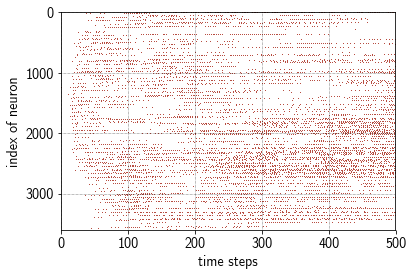

In [10]:
cmap = colors.ListedColormap(['#ffffff', '#b74d41'])
#plt.title('NEST Reservoir spikes')
plt.xlabel('time steps')
plt.ylabel('index of neuron')
plt.imshow(sn15l[9], cmap=cmap, aspect='auto')
#plt.savefig(exp2.net.plot.plotDir + 'spikes_raster_nest.svg')
pl = plt.show()

In [35]:
sl1 = sl[0] # spikes from loihi
sn1 = sn[0] # spikes from nest

sl2 = sl[1]  # spikes from loihi
sn2 = sn[1] # spikes from nest

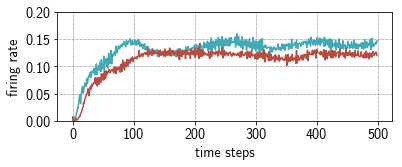

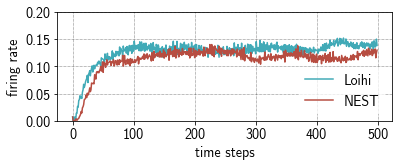

In [62]:
sl1m0 = np.mean(sl1, axis=0)
sn1m0 = np.mean(sn1, axis=0)
sl2m0 = np.mean(sl2, axis=0)
sn2m0 = np.mean(sn2, axis=0)

plt.figure(figsize=(6,2))
plt.plot(sl1m0, color=twoCols[0], label="Loihi")
plt.plot(sn1m0, color=twoCols[1], label="NEST")
plt.xlabel('time steps')
plt.ylabel('firing rate')
plt.yticks(np.arange(0, 0.21, step=0.05))
plt.ylim((0,0.2))
#plt.savefig(exp1.net.plot.plotDir + 'firingrate_exp1.svg')
pl = plt.show()

plt.figure(figsize=(6,2))
plt.plot(sl2m0, color=twoCols[0], label="Loihi")
plt.plot(sn2m0, color=twoCols[1], label="NEST")
plt.xlabel('time steps')
plt.ylabel('firing rate')
plt.yticks(np.arange(0, 0.21, step=0.05))
plt.ylim((0,0.2))
plt.legend()
#plt.savefig(exp2.net.plot.plotDir + 'firingrate_exp2.svg')
pl = plt.show()

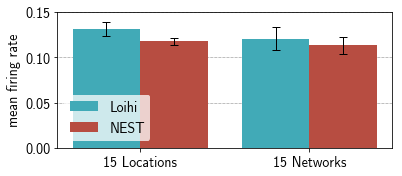

In [15]:
start = 100

plt.figure(figsize=(6,2.5))
barWidth = 1

# Values and errors
sl15l_f = np.mean(sl15l[:,:,start:], axis=(1,2))
sl15n_f = np.mean(sl15n[:,:,start:], axis=(1,2))
sn15l_f = np.mean(sn15l[:,:,start:], axis=(1,2))
sn15n_f = np.mean(sn15n[:,:,start:], axis=(1,2))

vl = [np.mean(sl15l_f), np.mean(sl15n_f)]
el = [np.std(sl15l_f), np.std(sl15n_f)]

vn = [np.mean(sn15l_f), np.mean(sn15n_f)]
en = [np.std(sn15l_f), np.std(sn15n_f)]

# Bar positions
r1 = [1, 3.5]
r2 = [2, 4.5]

plt.bar(r1, vl, yerr=el, width=barWidth, color=twoCols[0], ecolor='black', label='Loihi', error_kw=dict(lw=1, capthick=1, capsize=4))
plt.bar(r2, vn, yerr=en, width=barWidth, color=twoCols[1], ecolor='black', label='NEST', error_kw=dict(lw=1, capthick=1, capsize=4))

plt.xticks([1.5, 4], ['15 Locations', '15 Networks'])
#plt.yticks(np.arange(0, 0.151, step=0.025))

plt.grid(axis='x')

plt.legend()

plt.ylabel('mean firing rate')
#plt.xlim(-0.25, 1.25)
plt.ylim(0,0.15)
#plt.savefig(exp1.net.plot.plotDir + 'meanfiringrate.svg')
pl = plt.show()

In [16]:
print(scipy.stats.ttest_ind(sl15l_f, sn15l_f))
print(scipy.stats.ttest_ind(sl15n_f, sn15n_f))

Ttest_indResult(statistic=5.855521450896771, pvalue=2.701472715745509e-06)
Ttest_indResult(statistic=1.7100591649940398, pvalue=0.09831585387303951)


In [18]:
print(scipy.stats.pearsonr(sl15l_f, sn15l_f))
print(scipy.stats.pearsonr(sl15n_f, sn15n_f))

(0.4775944816564992, 0.07179240150720048)
(0.5590379323347727, 0.03027434850358785)


In [ ]:
def getClusteredFrequencies(sm, binSize, exp):
    topologyIndices = np.arange(exp.p.reservoirExSize).reshape((exp.p.topologySize, exp.p.topologySize))
    numBins = int(exp.p.topologySize / binSize)

    smb = []
    for i in range(numBins):
        # Define from and to variables for index i
        ifr, ito = i*binSize, (i+1)*binSize
        for j in range(numBins):
            # Define from and to variables for index j
            jfr, jto = j*binSize, (j+1)*binSize
            # Get topology indices and set connect neurons between output cluster and output neuron
            idc = topologyIndices[ifr:ito,jfr:jto]
            smb.append(np.mean(sm[idc]))
    return np.array(smb)

In [ ]:
binSize = 10
ex = exps[1]
numclusters = int(ex.p.reservoirExSize / np.square(binSize))

# Get binned spikes
slmb = getClusteredFrequencies(np.mean(sl1, axis=1), binSize, ex)
snmb = getClusteredFrequencies(np.mean(sn1, axis=1), binSize, ex)

# Plot Loihi
plt.figure(figsize=(6,2))
plt.bar(1+np.arange(numclusters), slmb, color=twoCols[0])
#plt.title('Loihi')
plt.xlabel('index of neuron pool')
plt.ylabel('mean frequency')
#plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
plt.xlim((0,numclusters+1))
plt.ylim((0,0.3))
plt.grid(axis='x')
#plt.savefig(exp1.net.plot.plotDir + 'frequency_loihi.svg')
pl = plt.show()

# Plot Nest
plt.figure(figsize=(6,2))
plt.bar(1+np.arange(numclusters), snmb, color=twoCols[1])
#plt.title('Nest')
plt.xlabel('index of neuron pool')
plt.ylabel('mean frequency')
#plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
plt.xlim((0,numclusters+1))
plt.ylim((0,0.3))
plt.grid(axis='x')
#plt.savefig(exp1.net.plot.plotDir + 'frequency_nest.svg')
pl = plt.show()

In [ ]:
exp1.net.plot.plotDir

In [ ]:
print(scipy.stats.ks_2samp(slmb/np.sum(slmb), snmb/np.sum(snmb)))

In [ ]:
topl = np.array([binl[:,i:i+60] for i in range(0,3600,60)])
topl = np.moveaxis(topl,1,0)

topn = np.array([binn[:,i:i+60] for i in range(0,3600,60)])
topn = np.moveaxis(topn,1,0)

In [ ]:
#topl = np.array([sl[i:i+60,:] for i in range(0,3600,60)])
#topl = np.moveaxis(topl,1,0)

#topn = np.array([sn[i:i+60,:] for i in range(0,3600,60)])
#topn = np.moveaxis(topn,1,0)

In [ ]:
topl.shape

In [ ]:
topl[topl>0.2] = 1
topl[topl<=0.2] = 0

In [ ]:
%matplotlib inline
cmap = colors.ListedColormap(['white', 'darkred'])
pl = plt.imshow(topl[:,:,0], cmap=cmap)

In [ ]:
topn[topn>0.2] = 1
topn[topn<=0.2] = 0

In [ ]:
%matplotlib inline
cmap = colors.ListedColormap(['white', 'darkred'])
pl = plt.imshow(topn[:,:,0], cmap=cmap)

%matplotlib notebook
import matplotlib.animation as animation

fig = plt.figure(figsize=(4,4))

#cmap = colors.ListedColormap(['white', 'darkred'])

frames = []
for i in range(topl.shape[0]):
    frames.append([plt.imshow(topl[i], animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True, repeat_delay=1000)
ani.save('loihi.mp4')
plt.show()

%matplotlib notebook
import matplotlib.animation as animation

fig = plt.figure(figsize=(4,4))

#cmap = colors.ListedColormap(['white', 'darkred'])

frames = []
for i in range(topn.shape[0]):
    frames.append([plt.imshow(topn[i], animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True, repeat_delay=1000)
ani.save('nest.mp4')
plt.show()